<a href="https://colab.research.google.com/github/sandralayas/My-Works/blob/Python/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LAB CYCLE 1**

A. Image Negative
1. Implement the image negative transformation function and apply it to a grayscale image.
2. Analyze the effect of image negative on different types of images (e.g., low contrast, high
contrast).
3. Compare the histogram of an original image with its negative. Explain the observed
differences.

B. Log Transformation
1. Implement the log transformation function and apply it to an image with a narrow range of
low gray-level values.
2. Analyze the effect of the log transformation on enhancing details in dark regions of an image.
3. Experiment with different values of the constant 'c' in the log transformation equation and
observe the changes in output image.

C. Power-Law Transformation
1. Implement the power-law transformation function with different values of gamma.
2. Apply the power-law transformation to enhance images with different contrast characteristics.
3. Analyze the effect of gamma values on the image appearance, especially for values less than
and greater than 1.
4. Experiment with different image types (e.g., medical, satellite, natural) to observe the impact
of transformations.

D. Spatial Filtering
1. Implement mean, median, and Gaussian filters. Apply them to images with different noise
types (salt-and-pepper, Gaussian) and compare the results.
2. Design a custom filter for sharpening edges while preserving image details. Apply it to a
natural image and evaluate its performance.
3. Experiment with different Laplacian operators (4-connected, 8-connected) and compare their
edge detection capabilities.

E. Image Enhancement: Arithmetic/Logic Operations
4. Implement image subtraction to detect changes between two images (e.g., before and after an
event).
5. Create a simple image watermarking system using image addition and subtraction.
6. Experiment with image averaging to reduce noise in a sequence of images.

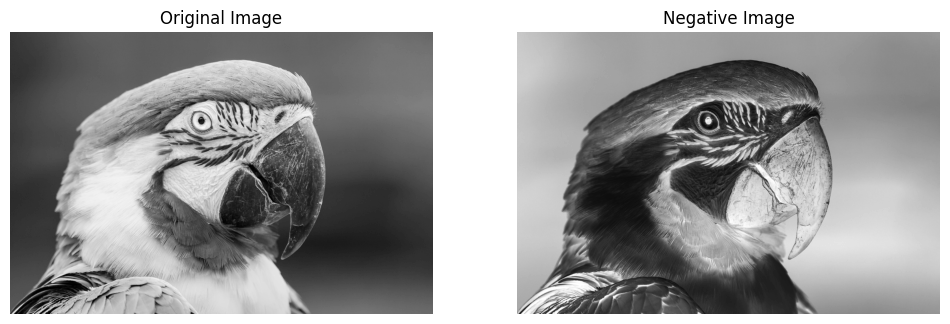

In [ ]:
'''
A. Image Negative

Implement the image negative transformation function and apply it to a grayscale image.
Analyze the effect of image negative on different types of images (e.g., low contrast, high contrast).
Compare the histogram of an original image with its negative. Explain the observed differences.

'''

import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_negative(image):
    return 255 - image

# Load a grayscale image
image = cv2.imread("/content/drive/MyDrive/data images/1.jpg", cv2.IMREAD_GRAYSCALE) # 'grayscale_image.jpg'

# Apply negative transformation
negative_image = image_negative(image)

# Display images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Negative Image')
plt.imshow(negative_image, cmap='gray')
plt.axis('off')

plt.show()


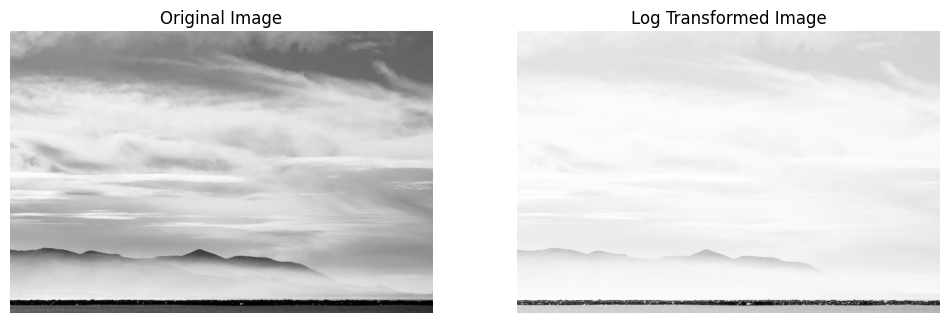

In [ ]:
# B. Log Transformation

def log_transformation(image, c=1.0):
    # Convert image to float32 to avoid truncation errors
    image_float = np.float32(image)
    # Apply log transformation
    log_image = c * np.log(1 + image_float)
    # Normalize to 0-255
    log_image = np.uint8(255 * (log_image - np.min(log_image)) / (np.max(log_image) - np.min(log_image)))
    return log_image

# Load a grayscale image with low gray-level values
image = cv2.imread('/content/drive/MyDrive/data images/2.jpg', cv2.IMREAD_GRAYSCALE) # 'low_contrast_image.jpg'

# Apply log transformation
log_image = log_transformation(image, c=10.0)

# Display images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Log Transformed Image')
plt.imshow(log_image, cmap='gray')
plt.axis('off')

plt.show()


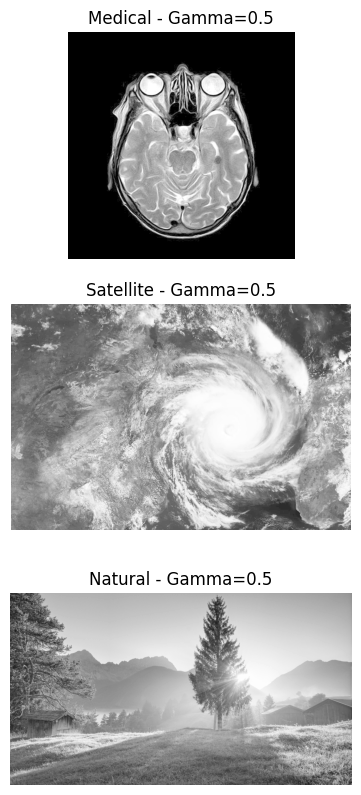

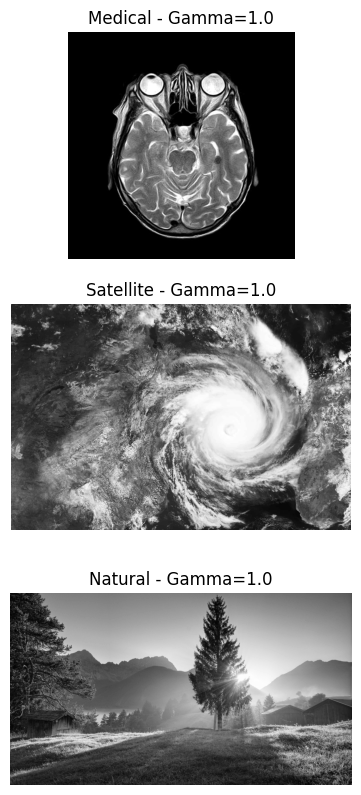

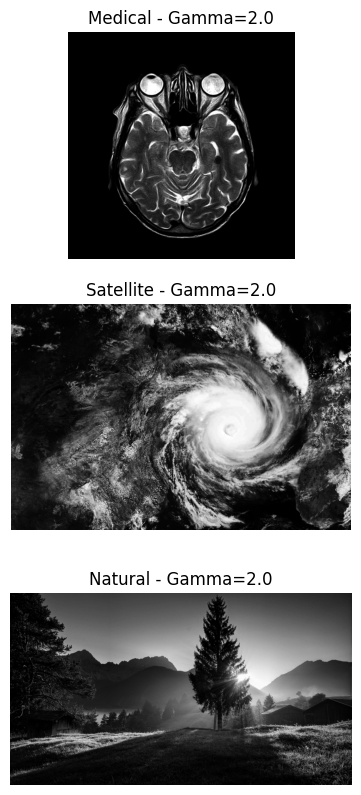

In [ ]:
# C. Power-Law Transformation

def power_law_transformation(image, gamma=1.0, c=1.0):
    # Convert image to float32
    image_float = np.float32(image) / 255.0
    # Apply power-law transformation
    power_law_image = c * np.power(image_float, gamma)
    # Normalize to 0-255
    power_law_image = np.uint8(255 * power_law_image)
    return power_law_image

# Load different types of images
images = {
    'Medical': cv2.imread('/content/drive/MyDrive/data images/3.jpg', cv2.IMREAD_GRAYSCALE), # 'medical_image.jpg'
    'Satellite': cv2.imread('/content/drive/MyDrive/data images/4.jpg', cv2.IMREAD_GRAYSCALE), # 'satellite_image.jpg'
    'Natural': cv2.imread('/content/drive/MyDrive/data images/5.jpg', cv2.IMREAD_GRAYSCALE) # 'natural_image.jpg'
}

gammas = [0.5, 1.0, 2.0]

for gamma in gammas:
    plt.figure(figsize=(15, 10))
    for i, (title, image) in enumerate(images.items()):
        transformed_image = power_law_transformation(image, gamma)
        plt.subplot(len(images), len(gammas), i*len(gammas) + gammas.index(gamma) + 1)
        plt.title(f'{title} - Gamma={gamma}')
        plt.imshow(transformed_image, cmap='gray')
        plt.axis('off')

    plt.show()


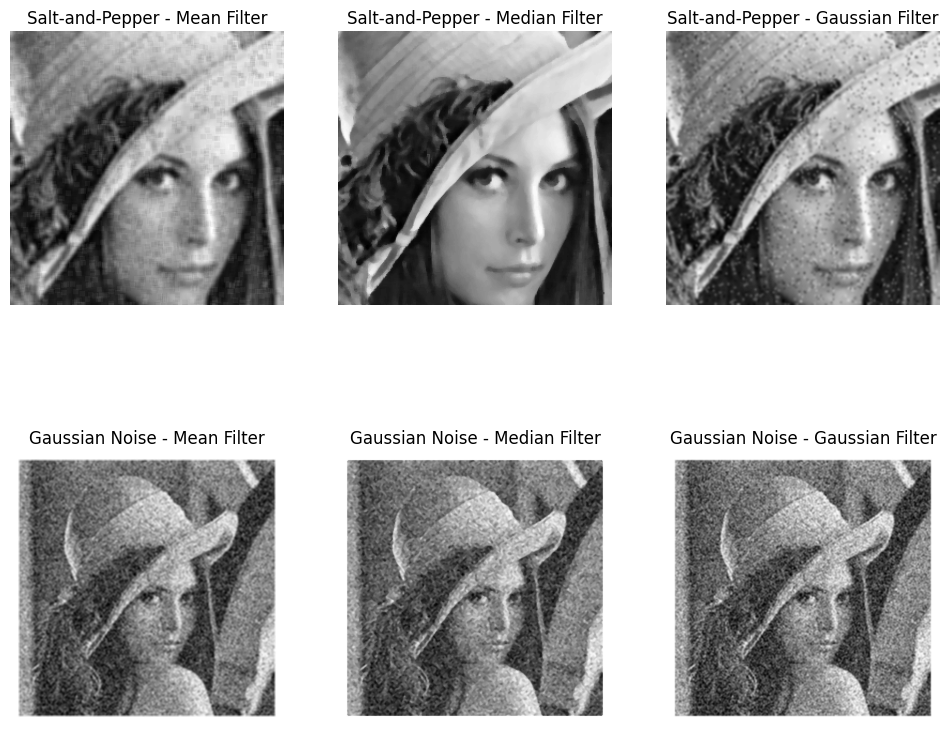

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_filters(image):
    # Mean Filter
    mean_filtered = cv2.blur(image, (5, 5))

    # Median Filter
    median_filtered = cv2.medianBlur(image, 5)

    # Gaussian Filter
    gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 0)

    return mean_filtered, median_filtered, gaussian_filtered

# Load images with noise (salt-and-pepper, Gaussian)
salt_and_pepper_image = cv2.imread('/content/drive/MyDrive/Datasets/data images/salt_pepper.png', cv2.IMREAD_GRAYSCALE)
gaussian_noise_image = cv2.imread('/content/drive/MyDrive/Datasets/data images/gaussian_noise.png', cv2.IMREAD_GRAYSCALE)

# Apply filters to salt-and-pepper image
mean_sp, median_sp, gaussian_sp = apply_filters(salt_and_pepper_image)

# Apply filters to Gaussian noise image
mean_gn, median_gn, gaussian_gn = apply_filters(gaussian_noise_image)

# Display results
plt.figure(figsize=(12, 10))
plt.subplot(2, 3, 1)
plt.title('Salt-and-Pepper - Mean Filter')
plt.imshow(mean_sp, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Salt-and-Pepper - Median Filter')
plt.imshow(median_sp, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Salt-and-Pepper - Gaussian Filter')
plt.imshow(gaussian_sp, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Gaussian Noise - Mean Filter')
plt.imshow(mean_gn, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Gaussian Noise - Median Filter')
plt.imshow(median_gn, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Gaussian Noise - Gaussian Filter')
plt.imshow(gaussian_gn, cmap='gray')
plt.axis('off')

plt.show()


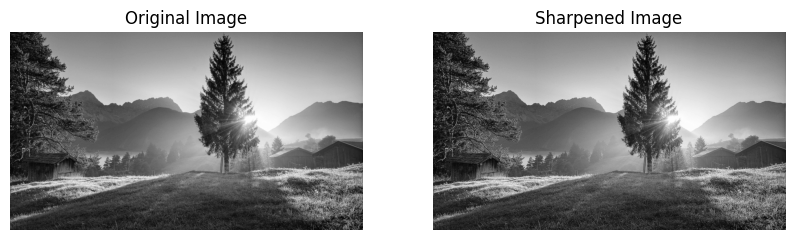

In [ ]:
def sharpen_filter(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

# Load a natural image
natural_image = cv2.imread('/content/drive/MyDrive/Datasets/data images/5.jpg', cv2.IMREAD_GRAYSCALE)

# Apply sharpening filter
sharpened_image = sharpen_filter(natural_image)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(natural_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sharpened Image')
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')

plt.show()


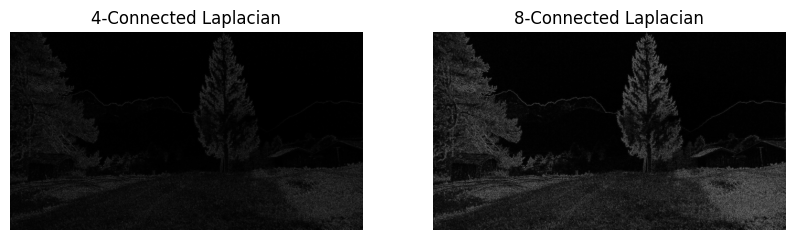

In [ ]:
def laplacian_filters(image):
    # 4-connected Laplacian
    kernel_4connected = np.array([[0, 1, 0],
                                  [1, -4, 1],
                                  [0, 1, 0]])

    # 8-connected Laplacian
    kernel_8connected = np.array([[1, 1, 1],
                                  [1, -8, 1],
                                  [1, 1, 1]])

    laplacian_4 = cv2.filter2D(image, -1, kernel_4connected)
    laplacian_8 = cv2.filter2D(image, -1, kernel_8connected)

    return laplacian_4, laplacian_8

# Apply Laplacian filters to the natural image
laplacian_4_result, laplacian_8_result = laplacian_filters(natural_image)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('4-Connected Laplacian')
plt.imshow(laplacian_4_result, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('8-Connected Laplacian')
plt.imshow(laplacian_8_result, cmap='gray')
plt.axis('off')

plt.show()


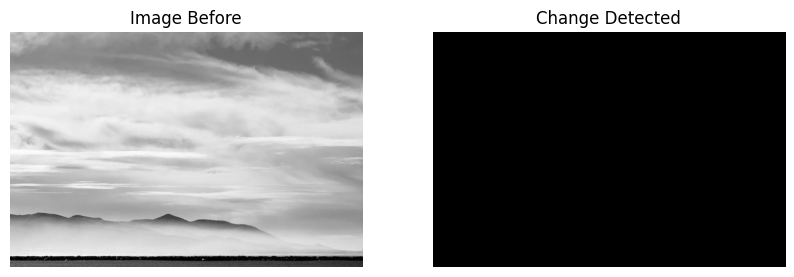

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_subtraction(image1, image2):
    return cv2.absdiff(image1, image2)

# Load two images (before and after)
image_before = cv2.imread('/content/drive/MyDrive/Datasets/data images/2.jpg', cv2.IMREAD_GRAYSCALE)
image_after = cv2.imread('/content/drive/MyDrive/Datasets/data images/2.jpg', cv2.IMREAD_GRAYSCALE)

# Perform image subtraction
change_detected = image_subtraction(image_before, image_after)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Image Before')
plt.imshow(image_before, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Change Detected')
plt.imshow(change_detected, cmap='gray')
plt.axis('off')

plt.show()


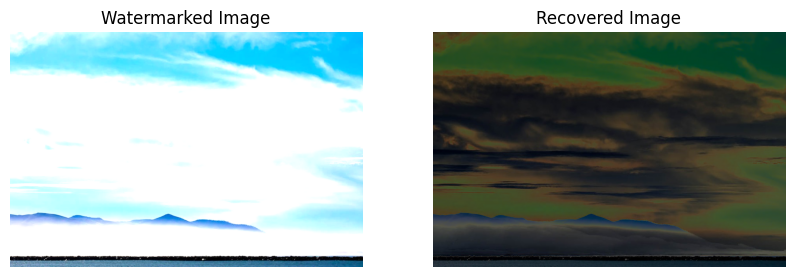

In [ ]:
def add_watermark(image, watermark, alpha=0.5):
    return cv2.addWeighted(image, 1, watermark, alpha, 0)

def subtract_watermark(image, watermark):
    return cv2.subtract(image, watermark)

# Load an image and a watermark
image = cv2.imread('/content/drive/MyDrive/Datasets/data images/2.jpg')
watermark = cv2.imread('/content/drive/MyDrive/Datasets/data images/2.jpg')

# Resize watermark to fit the image if necessary
watermark = cv2.resize(watermark, (image.shape[1], image.shape[0]))

# Add watermark to image
watermarked_image = add_watermark(image, watermark)

# Subtract watermark from image
recovered_image = subtract_watermark(watermarked_image, watermark)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Watermarked Image')
plt.imshow(cv2.cvtColor(watermarked_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Recovered Image')
plt.imshow(cv2.cvtColor(recovered_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


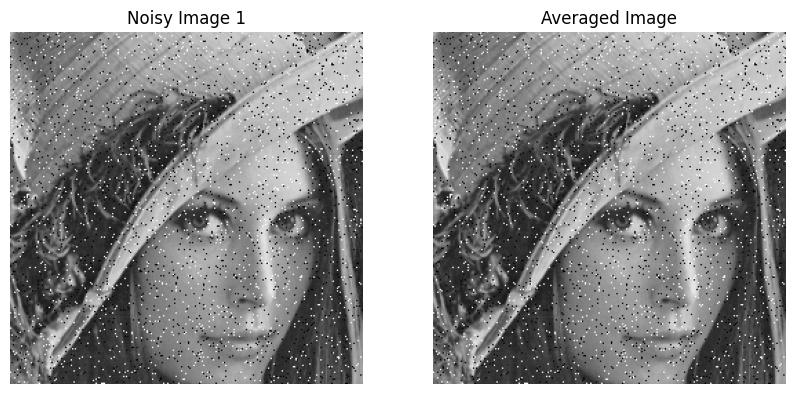

In [ ]:
def average_images(images):
    return np.mean(images, axis=0).astype(np.uint8)

# Load a sequence of noisy images (ensure they are of the same size)
image1 = cv2.imread('/content/drive/MyDrive/Datasets/data images/salt_pepper.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/drive/MyDrive/Datasets/data images/salt_pepper.png', cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread('/content/drive/MyDrive/Datasets/data images/salt_pepper.png', cv2.IMREAD_GRAYSCALE)

# Stack the images for averaging
image_stack = np.array([image1, image2, image3])

# Average the images
averaged_image = average_images(image_stack)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Noisy Image 1')
plt.imshow(image1, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Averaged Image')
plt.imshow(averaged_image, cmap='gray')
plt.axis('off')

plt.show()


# **LAB CYCLE 2**
A. Image Transform
1. Perform Discrete Fourier Transform, Z- transform KL Transform on a gray scale image.

B. Intensity Transformation and Histogram Processing
1. Implement histogram equalization and matching on a grayscale image. Compare the results
visually and quantitatively using metrics like entropy.
2. Design a contrast enhancement technique for images with low contrast. Apply it to a real-
world image and evaluate its effectiveness.

C. Frequency Domain Processing
1. Implement the 2D Discrete Fourier Transform (DFT) and its inverse.
2. Design low-pass, high-pass, and band-pass filters in the frequency domain. Apply them to an
image and analyze the results.
3. Implement homomorphic filtering and apply it to an image with uneven illumination.

D. Color Image Processing
1. Implement color space conversions between RGB, HSI, and YCbCr color models.
2. Perform color histogram equalization on a color image and analyze the results.
3. Implement color edge detection using Sobel or Canny operators.
4. Additional Practical Questions
  5. Image Segmentation: Implement thresholding, region-based, and edge-based segmentation
  techniques.
  6. Image Morphological Processing: Perform erosion, dilation, opening, and closing operations
  on binary images.
  7. Image Registration: Implement image registration techniques for aligning multiple images.
  Note: These questions are meant to provide a foundation for practical work in digital image
  processing.

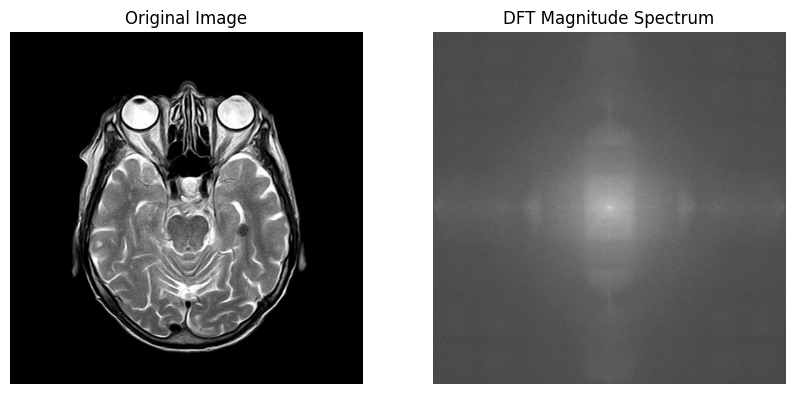

In [ ]:
'''

A. Image Transform

Perform Discrete Fourier Transform, Z- transform KL Transform on a gray scale image.

'''
import cv2
import numpy as np
import matplotlib.pyplot as plt

def perform_dft(image):
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shifted = np.fft.fftshift(dft)
    magnitude = cv2.magnitude(dft_shifted[:,:,0], dft_shifted[:,:,1])
    magnitude += 1  # to avoid log(0)
    magnitude = np.log(magnitude)

    return magnitude

# Load a grayscale image
image_path = '/content/drive/MyDrive/Datasets/data images/3.jpg'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform DFT
dft_image = perform_dft(gray_image)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('DFT Magnitude Spectrum')
plt.imshow(dft_image, cmap='gray')
plt.axis('off')

plt.show()


In [ ]:
def z_transform(signal):
    n = len(signal)
    z_transformed = np.array([np.sum(signal * np.exp(-1j * 2 * np.pi * k * np.arange(n) / n)) for k in range(n)])
    return z_transformed

# Apply Z-transform to each row of the image
z_transformed_image = np.array([z_transform(row) for row in gray_image])

# Display results (magnitude)
plt.figure(figsize=(10, 5))
plt.title('Z-Transform Magnitude (First Row)')
plt.imshow(np.abs(z_transformed_image[0]).reshape(1, -1), cmap='gray', aspect='auto')
plt.axis('off')
plt.show()


KeyboardInterrupt: 

In [ ]:
from scipy.linalg import eigh

def kl_transform(image):
    # Flatten the image and center it
    image_flattened = image.flatten()
    mean = np.mean(image_flattened)
    centered = image_flattened - mean

    # Compute covariance matrix
    cov_matrix = np.cov(centered.T)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = eigh(cov_matrix)

    # Sort eigenvalues and eigenvectors
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Transform the image
    transformed_image = np.dot(eigenvectors.T, centered)

    return transformed_image, eigenvalues

# Perform KL Transform on the grayscale image
kl_transformed, kl_eigenvalues = kl_transform(gray_image)

# Display results
plt.figure(figsize=(10, 5))
plt.title('KL Transform (First 10 Components)')
plt.plot(kl_transformed[:10])
plt.xlabel('Component Index')
plt.ylabel('Value')
plt.show()


ValueError: expected square "a" matrix

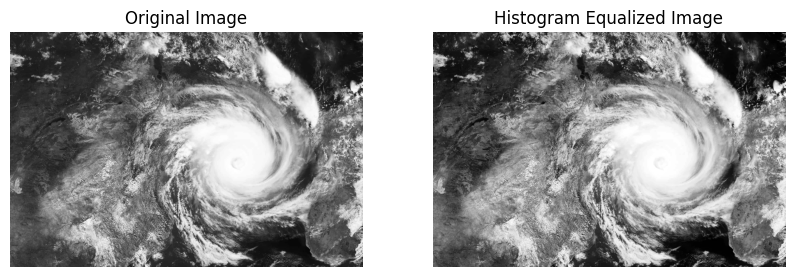

In [ ]:
'''

B. Intensity Transformation and Histogram Processing

Implement histogram equalization and matching on a grayscale image. Compare the results visually and quantitatively using metrics like entropy.
Design a contrast enhancement technique for images with low contrast. Apply it to a real- world image and evaluate its effectiveness.

'''
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

def histogram_equalization(image):
    return cv2.equalizeHist(image)

# Load a grayscale image
image_path = '/content/drive/MyDrive/Datasets/data images/4.jpg'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = histogram_equalization(gray_image)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Histogram Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.show()


In [ ]:
def histogram_matching(source, template):
    # Compute the histogram of the source image
    source_hist, bin_centers = np.histogram(source.flatten(), bins=256, range=[0, 256])
    source_cdf = source_hist.cumsum()
    source_cdf_normalized = source_cdf * source_hist.max() / source_cdf.max()

    # Compute the histogram of the template image
    template_hist, _ = np.histogram(template.flatten(), bins=256, range=[0, 256])
    template_cdf = template_hist.cumsum()
    template_cdf_normalized = template_cdf * template_hist.max() / template_cdf.max()

    # Use linear interpolation of the CDFs to find the new pixel values
    mapping = np.interp(source_cdf_normalized, template_cdf_normalized, bin_centers)

    # Map the pixel values in the source image
    matched_image = np.interp(source.flatten(), bin_centers, mapping).reshape(source.shape).astype('uint8')

    return matched_image

# Load a template image for matching
template_image_path = 'path/to/template/image.jpg'
template_image = cv2.imread(template_image_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram matching
matched_image = histogram_matching(gray_image, template_image)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Histogram Matched Image')
plt.imshow(matched_image, cmap='gray')
plt.axis('off')

plt.show()


AttributeError: 'NoneType' object has no attribute 'flatten'

In [ ]:
def calculate_entropy(image):
    hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    hist = hist / hist.sum()  # Normalize
    hist = hist[hist > 0]  # Remove zeros
    return -np.sum(hist * np.log2(hist))

# Calculate and compare entropy
original_entropy = calculate_entropy(gray_image)
equalized_entropy = calculate_entropy(equalized_image)
matched_entropy = calculate_entropy(matched_image)

print(f'Original Entropy: {original_entropy:.4f}')
print(f'Equalized Entropy: {equalized_entropy:.4f}')
print(f'Matched Entropy: {matched_entropy:.4f}')


NameError: name 'matched_image' is not defined

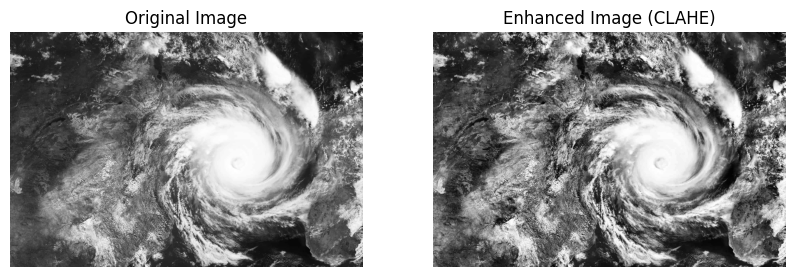

In [ ]:
'''

C. Frequency Domain Processing

Implement the 2D Discrete Fourier Transform (DFT) and its inverse.
Design low-pass, high-pass, and band-pass filters in the frequency domain. Apply them to an image and analyze the results.
Implement homomorphic filtering and apply it to an image with uneven illumination.

'''
def contrast_enhancement(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(image)
    return enhanced_image

# Apply contrast enhancement
enhanced_image = contrast_enhancement(gray_image)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Enhanced Image (CLAHE)')
plt.imshow(enhanced_image, cmap='gray')
plt.axis('off')

plt.show()


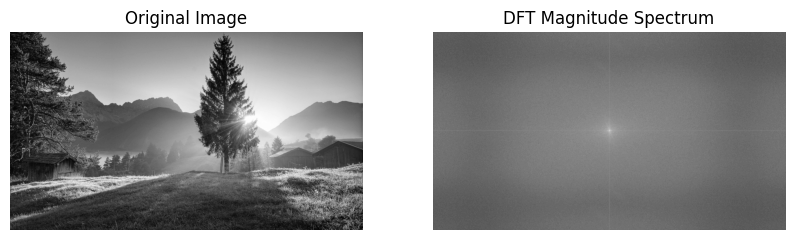

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dft_2d(image):
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shifted = np.fft.fftshift(dft)
    return dft_shifted

def idft_2d(dft_shifted):
    idft = cv2.idft(np.fft.ifftshift(dft_shifted))
    return cv2.magnitude(idft[:, :, 0], idft[:, :, 1])

# Load a grayscale image
image_path = '/content/drive/MyDrive/Datasets/data images/5.jpg'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform DFT
dft_image = dft_2d(gray_image)

# Display DFT magnitude
magnitude = cv2.magnitude(dft_image[:, :, 0], dft_image[:, :, 1])
magnitude += 1  # to avoid log(0)
magnitude = np.log(magnitude)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('DFT Magnitude Spectrum')
plt.imshow(magnitude, cmap='gray')
plt.axis('off')

plt.show()


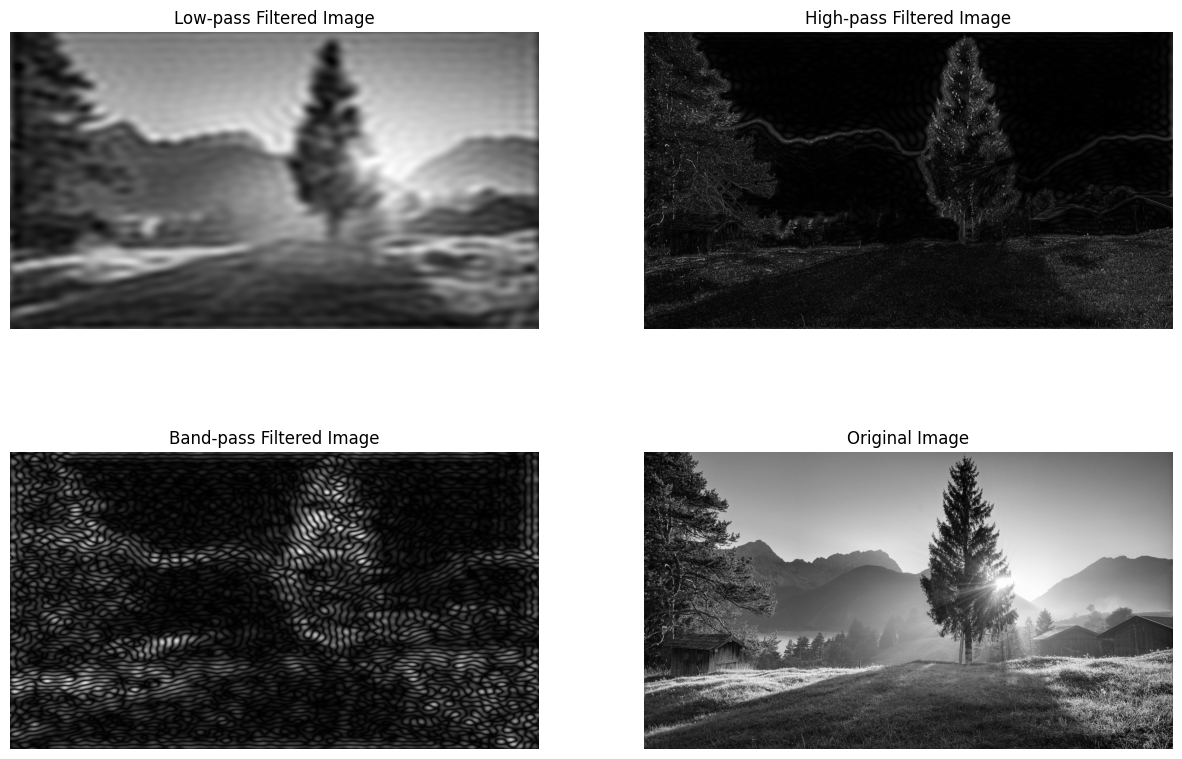

In [ ]:
def create_filter(shape, filter_type='lowpass', cutoff=30, bandwidth=10):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    distance = np.sqrt((x - crow)**2 + (y - ccol)**2)

    if filter_type == 'lowpass':
        filter_mask = distance <= cutoff
    elif filter_type == 'highpass':
        filter_mask = distance > cutoff
    elif filter_type == 'bandpass':
        filter_mask = (distance >= cutoff) & (distance <= (cutoff + bandwidth))

    return filter_mask.astype(np.float32)

# Create filters
lowpass_filter = create_filter(gray_image.shape, 'lowpass', cutoff=30)
highpass_filter = create_filter(gray_image.shape, 'highpass', cutoff=30)
bandpass_filter = create_filter(gray_image.shape, 'bandpass', cutoff=30, bandwidth=20)

# Apply filters to DFT
filtered_lowpass = dft_image * lowpass_filter[:, :, np.newaxis]
filtered_highpass = dft_image * highpass_filter[:, :, np.newaxis]
filtered_bandpass = dft_image * bandpass_filter[:, :, np.newaxis]

# Inverse DFT to get the images back
lowpass_image = idft_2d(filtered_lowpass)
highpass_image = idft_2d(filtered_highpass)
bandpass_image = idft_2d(filtered_bandpass)

# Display results
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.title('Low-pass Filtered Image')
plt.imshow(lowpass_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('High-pass Filtered Image')
plt.imshow(highpass_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Band-pass Filtered Image')
plt.imshow(bandpass_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Original Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.show()


<ipython-input-22-1e84ffa3e661>:20: RuntimeWarning: overflow encountered in expm1
  output_image = np.expm1(idft_image)


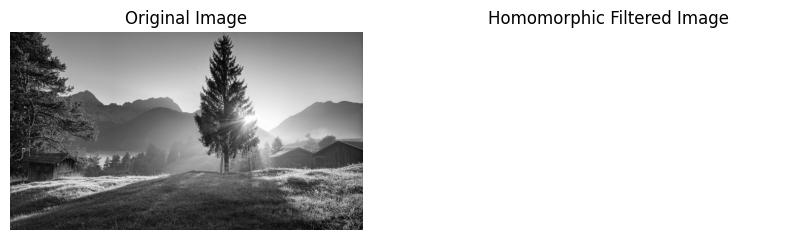

In [ ]:
def homomorphic_filter(image, cutoff=30, gamma_h=2.0, gamma_l=0.5):
    # Convert image to float and take logarithm
    log_image = np.log1p(image)

    # Perform DFT
    dft_image = dft_2d(log_image)

    # Create Gaussian high-pass filter
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    distance = np.sqrt((x - crow)**2 + (y - ccol)**2)
    highpass_filter = 1 - np.exp(-(distance**2 / (2 * (cutoff ** 2))))

    # Apply filter and inverse DFT
    filtered_dft = dft_image * highpass_filter[:, :, np.newaxis]
    idft_image = idft_2d(filtered_dft)

    # Scale back to [0, 255]
    output_image = np.expm1(idft_image)
    output_image = np.clip(output_image, 0, 255).astype(np.uint8)

    return output_image

# Apply homomorphic filtering
homomorphic_image = homomorphic_filter(gray_image)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Homomorphic Filtered Image')
plt.imshow(homomorphic_image, cmap='gray')
plt.axis('off')

plt.show()


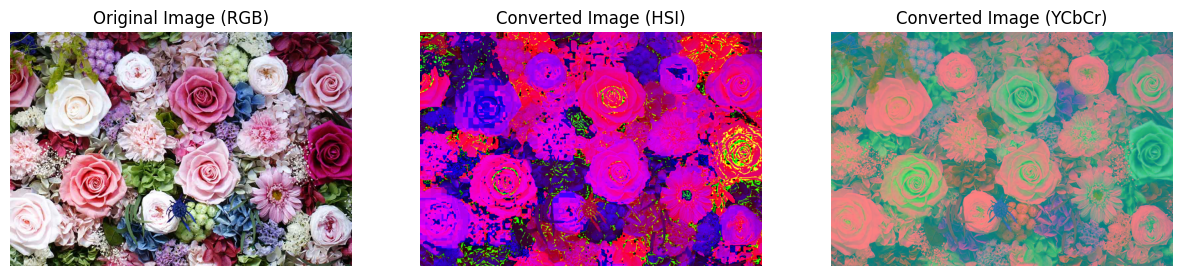

In [ ]:
'''

D. Color Image Processing

Implement color space conversions between RGB, HSI, and YCbCr color models.
Perform color histogram equalization on a color image and analyze the results.
Implement color edge detection using Sobel or Canny operators.

'''
import cv2
import numpy as np
import matplotlib.pyplot as plt

def rgb_to_hsi(image):
    # Normalize RGB values
    r, g, b = image[..., 0] / 255.0, image[..., 1] / 255.0, image[..., 2] / 255.0
    intensity = (r + g + b) / 3.0

    # Calculate hue
    numerator = 0.5 * ((r - g) + (r - b))
    denominator = np.sqrt((r - g) ** 2 + (r - b) * (g - b))
    theta = np.arccos(numerator / (denominator + 1e-10))
    hue = np.zeros_like(intensity)

    hue[b <= g] = theta[b <= g]
    hue[b > g] = 2 * np.pi - theta[b > g]
    hue = hue / (2 * np.pi)  # Scale to [0, 1]

    # Calculate saturation
    saturation = np.zeros_like(intensity)
    saturation[intensity > 0] = 1 - (np.min(image, axis=2)[intensity > 0] / intensity[intensity > 0])

    return np.stack((hue, saturation, intensity), axis=-1)

def rgb_to_ycbcr(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

# Load a color image
image_path = '/content/drive/MyDrive/Datasets/data images/flowers.jpg'
color_image = cv2.imread(image_path)
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

# Convert color spaces
hsi_image = rgb_to_hsi(color_image_rgb)
ycbcr_image = rgb_to_ycbcr(color_image_rgb)

# Display results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image (RGB)')
plt.imshow(color_image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Converted Image (HSI)')
plt.imshow(hsi_image)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Converted Image (YCbCr)')
plt.imshow(ycbcr_image)
plt.axis('off')

plt.show()


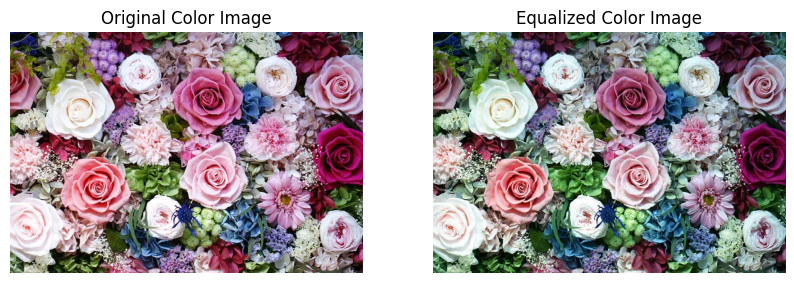

In [ ]:
def color_histogram_equalization(image):
    # Split the image into its respective channels
    channels = cv2.split(image)
    equalized_channels = []

    for channel in channels:
        equalized_channel = cv2.equalizeHist(channel)
        equalized_channels.append(equalized_channel)

    # Merge equalized channels back
    equalized_image = cv2.merge(equalized_channels)
    return equalized_image

# Apply color histogram equalization
equalized_image = color_histogram_equalization(color_image)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Color Image')
plt.imshow(color_image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Color Image')
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


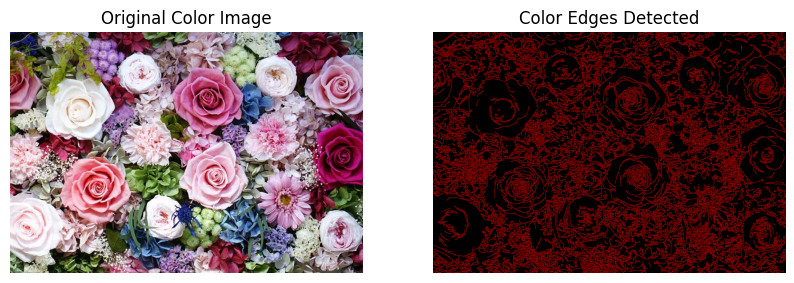

In [ ]:
def color_edge_detection(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detector
    edges = cv2.Canny(gray_image, 100, 200)

    # Create a colored edge image
    color_edges = np.zeros_like(image)
    color_edges[edges != 0] = [255, 0, 0]  # Red color for edges

    return color_edges

# Apply color edge detection
color_edges_image = color_edge_detection(color_image)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Color Image')
plt.imshow(color_image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Color Edges Detected')
plt.imshow(color_edges_image)
plt.axis('off')

plt.show()


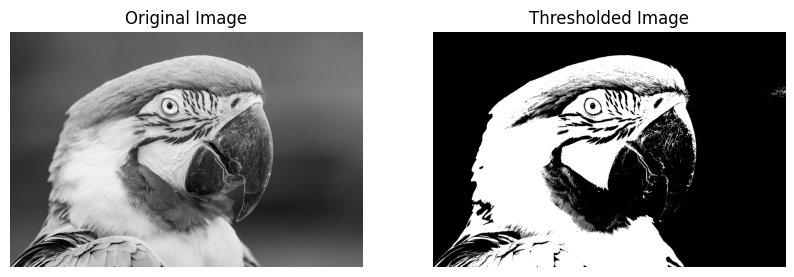

In [1]:
'''

Additional Practical Questions

Image Segmentation: Implement thresholding, region-based, and edge-based segmentation techniques.
Image Morphological Processing: Perform erosion, dilation, opening, and closing operations on binary images.
Image Registration: Implement image registration techniques for aligning multiple images. Note: These questions are meant to provide a foundation for practical work in digital image processing.

'''
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_threshold(image, thresh_value=127):
    _, thresh_image = cv2.threshold(image, thresh_value, 255, cv2.THRESH_BINARY)
    return thresh_image

# Load a grayscale image
image_path = '/content/drive/MyDrive/Datasets/data images/1.jpg'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply thresholding
thresholded_image = apply_threshold(gray_image, 127)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Thresholded Image')
plt.imshow(thresholded_image, cmap='gray')
plt.axis('off')

plt.show()


In [2]:
def region_based_segmentation(image):
    # Convert to grayscale and apply thresholding
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

    # Finding contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    markers = np.zeros_like(gray)
    for i, contour in enumerate(contours):
        cv2.drawContours(markers, contours, i, i + 1, -1)

    # Apply watershed algorithm
    cv2.watershed(image, markers)
    image[markers == -1] = [255, 0, 0]  # Mark boundaries in red
    return image

# Load a color image
color_image = cv2.imread(image_path)

# Apply region-based segmentation
segmented_image = region_based_segmentation(color_image)

# Display results
plt.figure(figsize=(10, 5))
plt.title('Region-Based Segmentation (Watershed)')
plt.imshow(segmented_image)
plt.axis('off')
plt.show()


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/segmentation.cpp:161: error: (-215:Assertion failed) src.type() == CV_8UC3 && dst.type() == CV_32SC1 in function 'watershed'


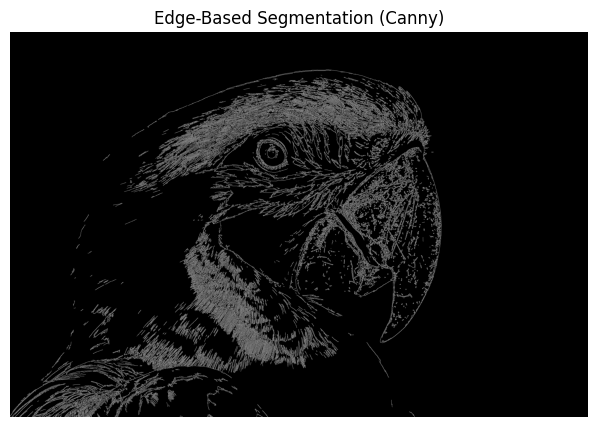

In [3]:
def edge_based_segmentation(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detector
    edges = cv2.Canny(gray, 100, 200)
    return edges

# Apply edge-based segmentation
edges_image = edge_based_segmentation(color_image)

# Display results
plt.figure(figsize=(10, 5))
plt.title('Edge-Based Segmentation (Canny)')
plt.imshow(edges_image, cmap='gray')
plt.axis('off')
plt.show()


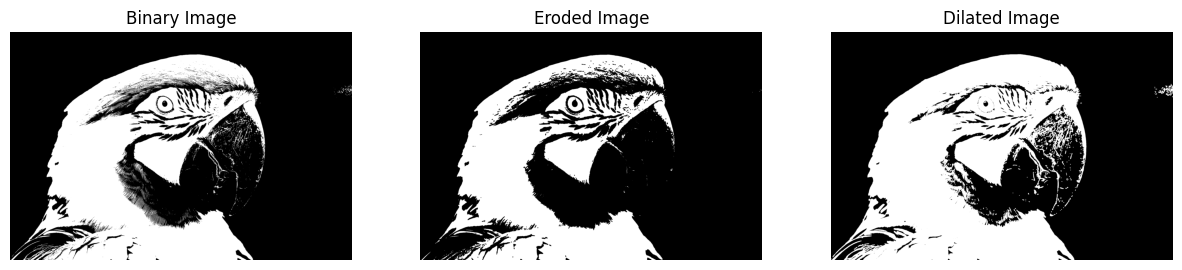

In [4]:
def morphological_operations(image):
    kernel = np.ones((5, 5), np.uint8)

    # Erosion
    erosion = cv2.erode(image, kernel, iterations=1)

    # Dilation
    dilation = cv2.dilate(image, kernel, iterations=1)

    return erosion, dilation

# Load a binary image (thresholded image can be used here)
binary_image = thresholded_image

# Perform morphological operations
eroded_image, dilated_image = morphological_operations(binary_image)

# Display results
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Eroded Image')
plt.imshow(eroded_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Dilated Image')
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')

plt.show()


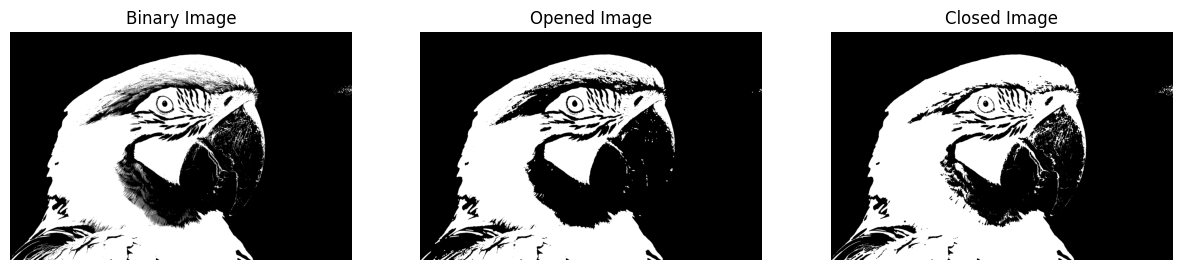

In [5]:
def opening_and_closing(image):
    kernel = np.ones((5, 5), np.uint8)

    # Opening
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

    # Closing
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

    return opening, closing

# Perform opening and closing
opened_image, closed_image = opening_and_closing(binary_image)

# Display results
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Opened Image')
plt.imshow(opened_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Closed Image')
plt.imshow(closed_image, cmap='gray')
plt.axis('off')

plt.show()


In [6]:
def image_registration(base_image, target_image):
    # Initiate ORB detector
    orb = cv2.ORB_create()

    # Find keypoints and descriptors
    kp1, des1 = orb.detectAndCompute(base_image, None)
    kp2, des2 = orb.detectAndCompute(target_image, None)

    # Create BFMatcher and match descriptors
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    # Sort matches by distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw matches
    matched_image = cv2.drawMatches(base_image, kp1, target_image, kp2, matches[:30], None, flags=2)

    return matched_image

# Load base and target images
base_image_path = 'path/to/your/base_image.jpg'
target_image_path = 'path/to/your/target_image.jpg'
base_image = cv2.imread(base_image_path, cv2.IMREAD_GRAYSCALE)
target_image = cv2.imread(target_image_path, cv2.IMREAD_GRAYSCALE)

# Perform image registration
registered_image = image_registration(base_image, target_image)

# Display results
plt.figure(figsize=(10, 5))
plt.title('Image Registration')
plt.imshow(registered_image)
plt.axis('off')
plt.show()


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
